In [6]:
#Importing necessary modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [24]:
#Data collection
data = pd.read_csv("Cardiovascular diseases research paper - Form Responses 1.csv").drop_duplicates()

#Preparing replacement to process feature data
rep_f = {
    "Age (years)": [0],
    
    'Gender':["Male",
              "Female"],
    
    'Marital status': ["Single",
                       "Married",
                       "Divorced"],
    
    'Occupation': ["Professional",
                   "Business",
                   "Government Employee", 
                   "Daily wage Labour", 
                   "Unemployed", 
                   "Student", 
                   "Retired", 
                   "Housewife", 
                   "Salaried Employee"],

    'Working hours per week': ["Upto 40 hours per week",
                               "40- 50 hours per week",
                               "More than 50 hours per week"],
    
    'History of Diabetes (Type 2)': ["NonDiabetic",
                                     "Recently detected",
                                     "Longterm Controlled",
                                     "Longterm Uncontrolled"],
    
    "History of Hypertension": ["Yes",
                                "No"],
    
    "History of Dyslipidemia (altered lipid profile)": ["Yes",
                                                        "No"],
    
    'H/o Alcohol consumption': ["Yes",
                                "No"],
    
    "H/o Smoking": [0],
    
    "Are you engaged in any physical activity? (Walking/Jogging/Running/Swimming/Cycling/Exercise/ Workouts)": [0],
    
    "Diet preference?": [0],
    
    "How often do you eat in restaurants?": ["Less than once a week",
                                            "Once a week",
                                            "More than once a week"],
    
    "Hours of Sleep per day?": ["Less than 6 hours per day",
                              "6 to 8 hours per day",
                              "More than 8 hours per day"],
    
    "Do you suffer from Sleep Apnoea?": ["Yes",
                                         "No"],
    
    "H/o chronic kidney disease": ["Yes",
                                   "No"],
    
    "H/o Cerebrovascular disease (Stroke/ Paralysis/TIA)": ["Yes",
                                                            "No"],
    
    "Family History of Cardiovascular disease": ["Yes",
                                                 "No"],
    
    "Pulse": [0],
    
    "Systole": [0],
    
    "Diastole": [0],
    
    "Body Mass Index (BMI)   Kg/m2": ["Normal (19-24)",  
                                     "Overweight (25-30)",
                                     "Obese ( >30)"],
    
    "Total Cholesterol": ["Normal (Upto 200 mg/dl)",
                         "Increased ( more than 200 mg/dl)"],
    
    "Triglycerides": ["Normal ( Upto 200 mg/dl)",
                     "Increased ( More than 200 mg/dl)"],
    
    "LDL": ["Normal (Upto 130 mg/dl)",
            "Increased ( More than 130 mg/dl)"],    
    
    "HDL": ["Normal (More than 35mg/dl)",
            "Decreased (Less than 35mg/dl)"],
    
    "Fasting Blood sugar": ["Normal (Upto 125mg/dl)",
                            "Increased (More than 125mg/dl)"],
    
    "Post Prandial Blood sugar": ["Normal (Upto 180mg/dl)",
                                  "Increased (More than 180mg/dl)"],
    
    "HbA1c": ["Less than 6.1",
             "6.1 to 7.1",
             "More than 7.1"],
    
    "hsCRP": ["Normal (upto 3mg/L)",
              "Increased (More than 3mg/L)"],
    
    "ECG findngs": ["Abnormal",
                   "Normal"],
    
    "Stress test": ["Negative",
                   "Not done",
                   "Positive"],
    
    "2D Echo findings": ["Abnormal",
                         "Not Done",
                         "Normal"],
    
    "Coronary Angiography done": ["Yes",
                                  "No"],
    
    "Do you consume Whole fat dairy or animal products": ["Yes",
                                                          "No"]
}

#Column-wise feature data processing
data["H/o Smoking"] = np.where(data["H/o Smoking"]=="No", 0, np.where(data["If smoker, since how many years?"]=="Less than 5 years", 1, 2))
data = data.drop(["If smoker, since how many years?"], axis = 1)

data["Are you engaged in any physical activity? (Walking/Jogging/Running/Swimming/Cycling/Exercise/ Workouts)"] = np.where(data["Are you engaged in any physical activity? (Walking/Jogging/Running/Swimming/Cycling/Exercise/ Workouts)"]=="No", 0, np.where(data["If yes, how many minutes per day?"]=="Less than 40 minutes per day", 1, np.where(data["If yes, how many minutes per day?"]=="40 minutes per day", 2, 3)))
data = data.drop(["If yes, how many minutes per day?"], axis = 1)

data["Diet preference?"] = np.where(data["Diet preference?"]=="Vegetarian", 0, np.where(data["If Non-Vegetarian, do you consume red meat?"]=="No", 1, 2))
data = data.drop(["If Non-Vegetarian, do you consume red meat?"], axis = 1)

s = []
d = []
for i in data["Blood pressure (mmHg)"]:
    s.append(int(i.split("/")[0]))
    d.append(int(i.split("/")[1]))
    
data["Systole"] = s
data["Diastole"] = d
data = data.drop(["Blood pressure (mmHg)"], axis = 1)

for col in rep_f.keys():
    data[col] = data[col].replace(rep_f[col], list(range(len(rep_f[col]))))
    
    a = data[col].copy()
    
    if not a.dtype == 'O':
        a = (a - a.min())/(a.max()-a.min())
    data[col] = a

#Outcome data processing
rep_o = [np.nan, 
       "Insignificant coronary artery disease", 
       "Significant coronary artery disease"]

data['Findings of Angiography'] = data['Findings of Angiography'].replace(rep_o, [0,1,2])

#Display final data
display(data)

,Gender,Marital status,Occupation,Working hours per week,History of Diabetes (Type 2),History of Hypertension,History of Dyslipidemia (altered lipid profile),H/o Alcohol consumption,H/o Smoking,Are you engaged in any physical activity? (Walking/Jogging/Running/Swimming/Cycling/Exercise/ Workouts),...,ECG findngs,Stress test,2D Echo findings,Coronary Angiography done,Findings of Angiography,Type of intervention,Do you consume Whole fat dairy or animal products,Age (years),Systole,Diastole
0,1.0,0.5,0.000,0.0,0.000000,1.0,1.0,1.0,0.0,0.000000,...,1.0,0.0,0.5,1.0,0,NaN,1.0,0.20,0.178571,0.35
1,0.0,0.5,0.000,1.0,0.666667,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.5,0.0,0.0,1,Medical management,1.0,0.34,0.535714,0.55
2,0.0,0.5,0.000,0.0,0.666667,0.0,0.0,1.0,0.0,0.333333,...,0.0,0.5,0.0,0.0,2,Percutaneous Coronary Angiography,0.0,0.90,0.714286,0.65
3,1.0,0.5,0.000,1.0,0.666667,1.0,0.0,1.0,0.0,0.666667,...,0.0,0.5,0.0,0.0,2,Percutaneous Coronary Angiography,1.0,0.90,0.357143,0.40
4,0.0,0.5,0.750,0.0,1.000000,0.0,0.0,1.0,0.0,0.000000,...,1.0,1.0,0.0,0.0,2,Coronary Arterial Bypass Graft,0.0,0.74,0.785714,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1.0,0.5,0.875,0.0,0.000000,0.0,1.0,1.0,0.0,0.000000,...,1.0,0.0,0.5,1.0,0,NaN,1.0,0.88,0.357143,0.55
61,0.0,0.0,0.000,1.0,1.000000,0.0,0.0,0.0,0.0,0.000000,...,1.0,1.0,0.0,0.0,2,Coronary Arterial Bypass Graft,1.0,0.12,0.785714,0.70
62,0.0,1.0,0.000,0.5,0.666667,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.5,0.0,0.0,2,Percutaneous Coronary Angiography,0.0,0.46,0.535714,0.75
63,0.0,1.0,0.000,0.5,0.666667,1.0,0.0,0.0,1.0,1.000000,...,1.0,1.0,0.0,0.0,2,Percutaneous Coronary Angiography,1.0,0.40,0.178571,0.30


0.8


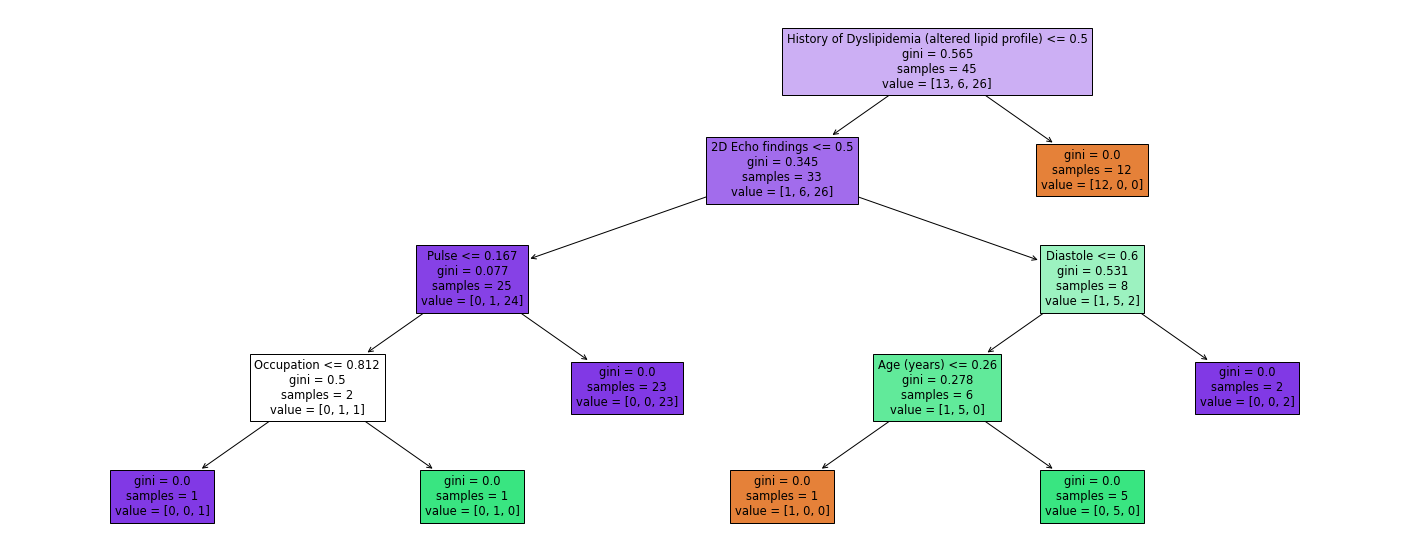

In [30]:
#Separating Features and Outcomes
X = data[rep_f.keys()]
Y = data["Findings of Angiography"]

#Splitting into training and testing data
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.30,shuffle=True)

#Fitting data into model
model = DecisionTreeClassifier()
model.fit(train_x,train_y)

#Making prediction and calculating accuracy
pred= model.predict(test_x)

acc = accuracy_score(test_y, pred)
    
print(acc)

#Visualizing the tree
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(model, 
                   feature_names=list(rep_f.keys()),
                   filled=True)
fig.savefig("decistion_tree.png")